In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [12]:
#Import the dataset

dataset = pd.read_csv('consumer perception form 1.csv')

#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset

,Name,Age,Gender,which type of area you are living in.,Patanjali products are gaining popularity in the market.,These days people often discuss Patanjali products.,Availability of Patanjali products has increased in recent times. They are available everywhere from Grocery stores to hypermarkets.,Advertisements of Patanjali products are more visible in recent times.,Patanjali gained reputation because of superior quality products and benefits.,We purchase Patanjali products because they are easily affordable at better prices,We purchase Patanjali products because they symbolize purity.,"Patanjali products compete with global brands in terms of affordability, quality and purity.",Patanjali products are sa2 because they are made from natural ingredients,Patanjali of2rs a wide variety of products with better worth.,Patanjali has emerged as a powerful brand and as a strong competitor to MNCs,Patanjali should increase the promotion and advertisements of their products,"Before purchasing any Patanjali product, we are sufficiently aware about the product.",Low prices are adjudged as poor quality. This perception will af2ct Patanjali products in future
0,Sai Nitesh,26,1,1,3,3,4,4,3,3,3,4,4,4,3,3,3,3
1,Patsamatla Pavan Kumar,2,1,1,3,4,3,5,3,3,4,3,2,5,5,2,4,3
2,Praveen kumar,24,1,1,4,4,5,2,2,4,4,4,4,4,4,5,4,4
3,Himatesh,22,1,1,3,2,4,3,1,2,2,3,2,3,2,2,2,4
4,Madhav,24,1,1,3,2,2,2,3,3,3,2,4,3,2,5,1,1
5,Dilip Manne,22,1,1,4,3,5,2,2,4,3,2,3,4,2,4,2,4
6,Sirineni Harshitha,22,2,1,5,5,5,4,4,3,3,5,5,4,5,4,4,3
7,Aishwarya,22,2,1,2,2,3,3,2,3,3,3,3,4,4,4,4,4
8,Megha Mankal,2,2,2,3,3,2,3,2,4,3,3,4,3,3,4,3,4
9,Shivam Shandilya,25,1,1,3,4,4,4,4,4,3,2,4,3,4,4,4,2


In [13]:
dataset.shape

(62, 18)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   Name                                                                                                                                                  62 non-null     object
 1   Age                                                                                                                                                   62 non-null     object
 2   Gender                                                                                                                                                62 non-null     int64 
 3   wh

In [15]:
#Missing values computation
dataset.isnull().sum()

Name                                                                                                                                                    0
Age                                                                                                                                                     0
Gender                                                                                                                                                  0
which type of area you are living in.                                                                                                                   0
Patanjali  products  are  gaining  popularity  in  the market.                                                                                          0
These  days  people  often  discuss  Patanjali  products.                                                                                               0
Availability  of  Patanjali  products  has  increased  in  recent  times.  T

In [23]:
X= dataset.iloc[:, [8,12,13]].values

In [24]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

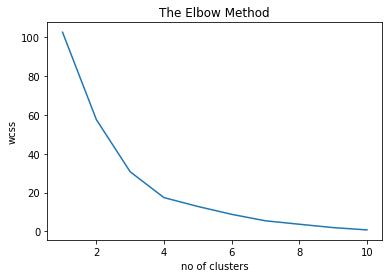

In [18]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

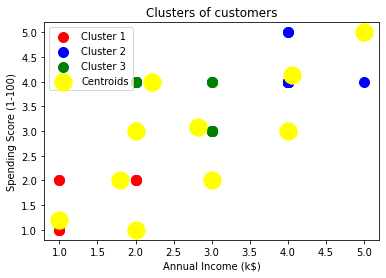

In [26]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()